In [1]:
import pandas as pd
import project_types as pt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sys
import codebase as cb
from IPython.display import Markdown

plt.rcParams['figure.figsize'] = [8, 8]

def pmark(s):
    display(Markdown(s))


from importlib import reload
reload(cb);
reload(pt);

In [2]:
pict = pd.read_csv(pt.pict_info)

# Loading the data

In [4]:
pict_df, arch_df = cb.load_data(max_size=[2000, 2000])

art_or_building = cb.get_art_or_building(pict_df, arch_df)
pmark(f'Image indexed: {len(art_or_building)}')
pmark(f'&emsp; ├── architecture: {len(art_or_building[art_or_building.art_class=="architecture"])}')
pmark(f'&emsp; ├── pictures: {len(art_or_building[art_or_building.art_class=="picture"])}')

Image acceppeted (i.e. sufficient size): 18672

&emsp; ├── architecture: 9336

&emsp; ├── pictures: 9336

# Images size

tot. 18780

├── architetcure: 9390</br>├── pictures: 9390

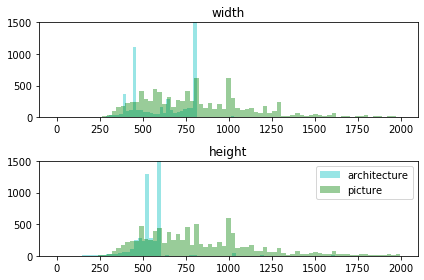

In [19]:
bins = 75

class_arch, class_pic = art_or_building.art_class.value_counts()
pmark(f'tot. {len(art_or_building)}')
pmark(f'├── architetcure: {class_arch}</br>├── pictures: {class_pic}')

for idx, col in enumerate(['width', 'height']):
    ax = plt.subplot(2,1,idx+1)
    plt.ylim([0, 1500])
    ax.title.set_text(col)
    plt.hist(arch_df[col], 
             bins, histtype='bar', alpha = 0.4, color= 'c', label='architecture')
    plt.hist(pict_df[col], 
             bins, histtype='bar', alpha = 0.4, color= 'g', label='picture')

plt.tight_layout()
plt.legend()    
plt.show()

# One hot